<a href="https://colab.research.google.com/github/akitim/Motorica_Gesture_Classification_Task/blob/main/Motorica_gesture_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !mv /content/X_test.npy /home/
# !mv /content/X_train.npy /home/
# !mv /content/sample_submission.csv /home/
# !mv /content/y_train.csv /home/

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [11]:
X_test = np.load('/content/X_test.npy')
X_train = np.load('/content/X_train.npy')
# sample_submission = pd.read_csv('/home/sample_submission.csv')
# y_train = pd.read_csv('/home/y_train.csv')
    
sample_submission = \
    pd.read_csv('https://raw.githubusercontent.com/akitim/'+
        'Motorica_Gesture_Classification_Task/main/data/sample_submission.csv')
y_train = \
    pd.read_csv('https://raw.githubusercontent.com/akitim/'+
        'Motorica_Gesture_Classification_Task/main/data/y_train.csv')

In [12]:
# нормализуем X_train и X_test на 4096
print(f"до: {X_train[0, 0, 0:10]} ")
X_train /= 4096
X_test /= 4096

print(f'после: {X_train[0, 0, 0:10]}')

до: [1331. 1333. 1331. 1332. 1334. 1334. 1333. 1334. 1335. 1334.] 
после: [0.32495117 0.32543945 0.32495117 0.32519531 0.32568359 0.32568359
 0.32543945 0.32568359 0.32592773 0.32568359]


# Характеристика датасета

In [13]:
X_train.shape, y_train.shape, X_test.shape
# X_test

((165, 40, 60), (165, 2), (166, 40, 60))

- "0" - разгиб жеста "grab";
- "1" - разгиб жеста "ok";
- "2" - разгиб большого пальца;
- "3" - разгиб указательного пальца;
- "4" - разгиб жеста "пистолет";
- "5" - разгиб среднего пальца;
- "6" - разгиб безымянного пальца;
- "7" - разгиб мизинца;
- "8" - сгиб мизинца;
- "9" - сгиб безымянного пальца;
- "10" - сгиб среднего пальца;
- "11" - сгиб жеста "пистолет";
- "12" - сгиб указательного пальца;
- "13" - сгиб большого пальца;
- "14" - сгиб жеста "ok";
- "15" - сгиб жеста "grab";

## Классы (y_train)

In [14]:
y_train.sample(5)

,Id,Class
110,110,3
135,135,9
116,116,15
5,5,10
46,46,1


Количество объектов каждого класса:

In [15]:
y_train['Class'].value_counts().sort_index()

0     11
1     10
2     10
3     10
4     10
5     11
6     10
7     11
8     10
9     10
10    10
11    10
12    11
13    10
14    10
15    11
Name: Class, dtype: int64

In [17]:
print(f'sample_submission shape: {sample_submission.shape}\n')
sample_submission.sample(5)

sample_submission shape: (166, 2)



,Id,Class
92,257,0
122,287,13
7,172,12
3,168,7
28,193,9


In [20]:
def del_emty_axes(axs):
    # удаляем пустые графики
    for axes in axs.flatten():
        if not(axes.has_data()):
            fig.delaxes(axes)
    return None

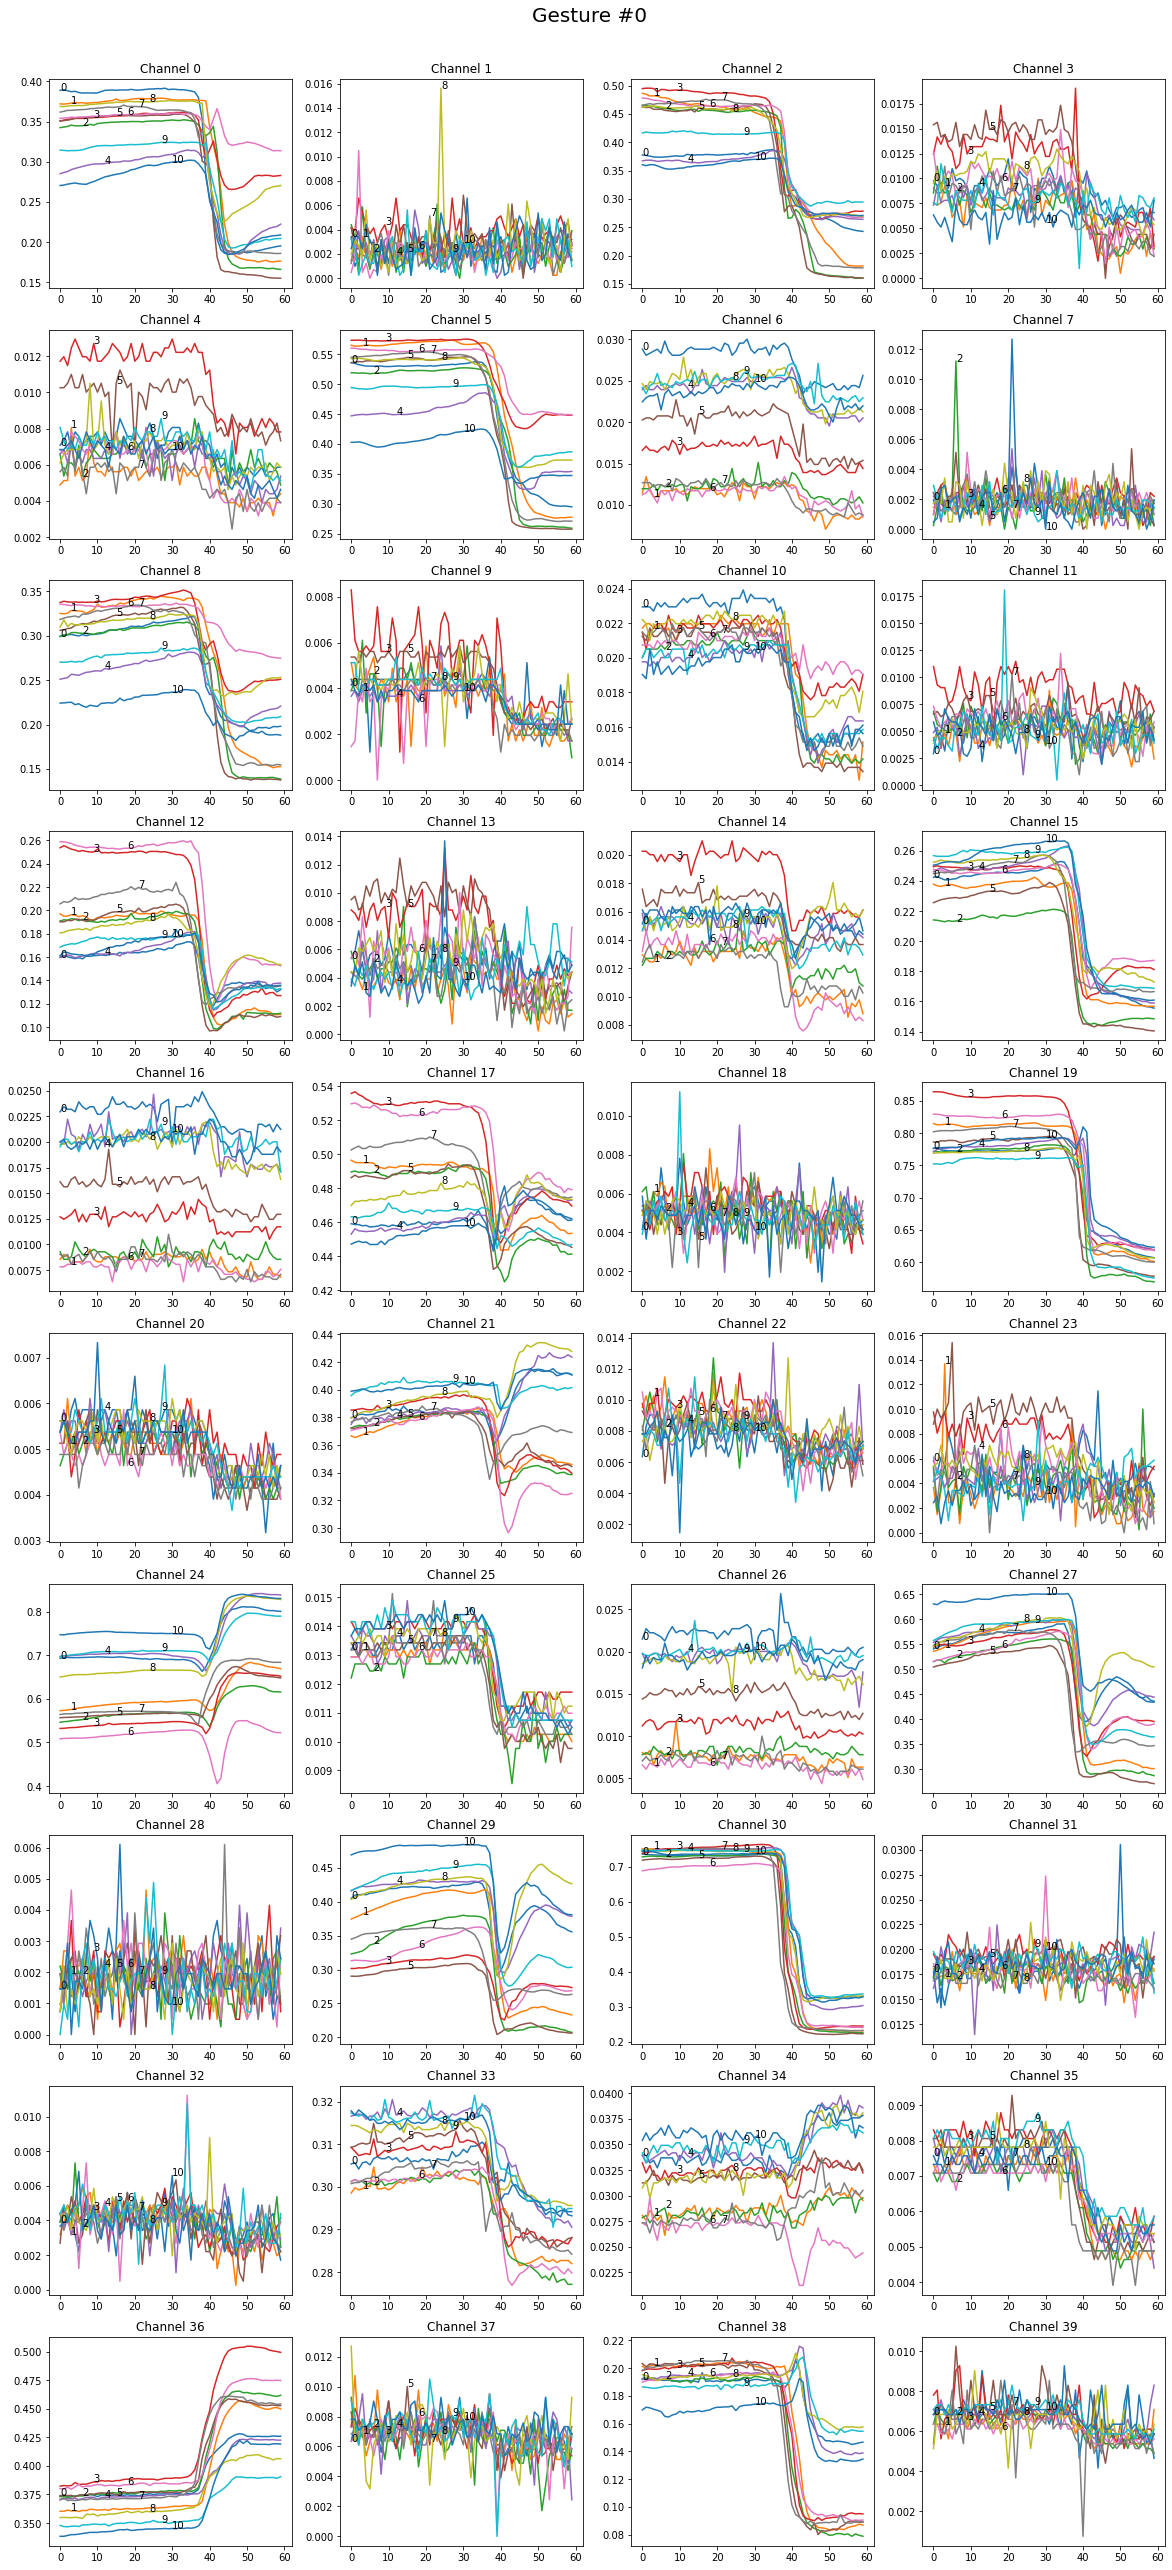

In [ ]:
# "0" - разгиб жеста "grab";
# "1" - разгиб жеста "ok";
# "2" - разгиб большого пальца;
# "3" - разгиб указательного пальца;
# "4" - разгиб жеста "пистолет";
# "5" - разгиб среднего пальца;
# "6" - разгиб безымянного пальца;
# "7" - разгиб мизинца;
# "8" - сгиб мизинца;
# "9" - сгиб безымянного пальца;
# "10" - сгиб среднего пальца;
# "11" - сгиб жеста "пистолет";
# "12" - сгиб указательного пальца;
# "13" - сгиб большого пальца;
# "14" - сгиб жеста "ok";
# "15" - сгиб жеста "grab";

for k in range(1):
    # индексы одного класса в X_train
    cls_ls = [0]
    cls = cls_ls[k] # метка жеста 
    cls_indices = np.asarray(y_train[y_train['Class'] == cls].index)

    num_of_channels = X_train.shape[1]

    fig_n_cols = 4
    fig, axs = plt.subplots(num_of_channels // fig_n_cols + 1, fig_n_cols, 
                        figsize=(20, 5 * num_of_channels // fig_n_cols))
    fig.suptitle(t=f'Gesture #{cls}', y=0.9, fontsize=20);

    # строим графики всех наблюдений одного класса в X_train
    for i in range(num_of_channels):
        ax_curr = axs[i // fig_n_cols, i % fig_n_cols]
        ax_curr.set_title(f'Channel {i}')

        for j in range(len(cls_indices)):
            ax_curr.plot(X_train[cls_indices[j], i, :], label=cls);
            ax_curr.text(j*3, X_train[cls_indices[j], i, j*3], f'{j}');

del_emty_axes(axs)

    # удаляем пустые графики
    # for axes in axs.flatten():
    #     if not(axes.has_data()):
    #         fig.delaxes(axes)

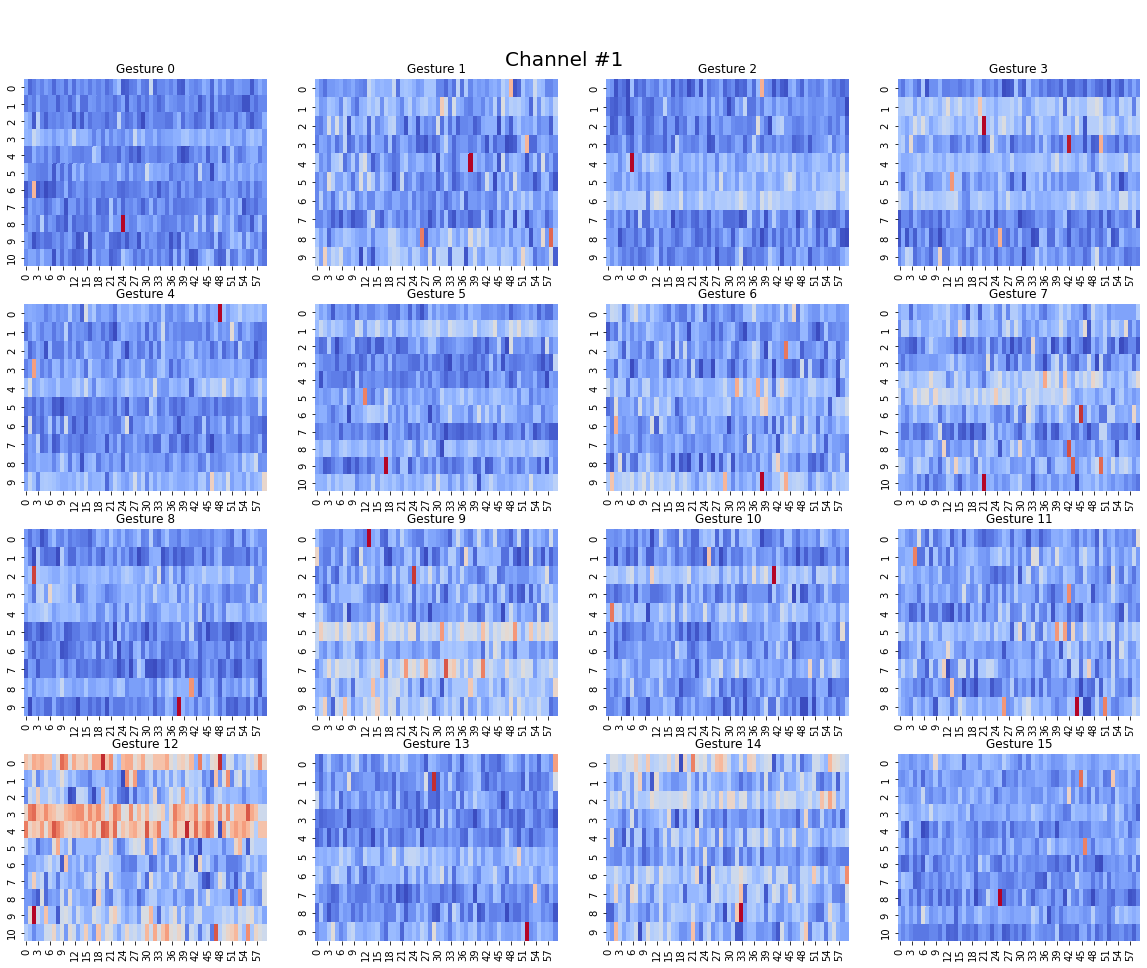

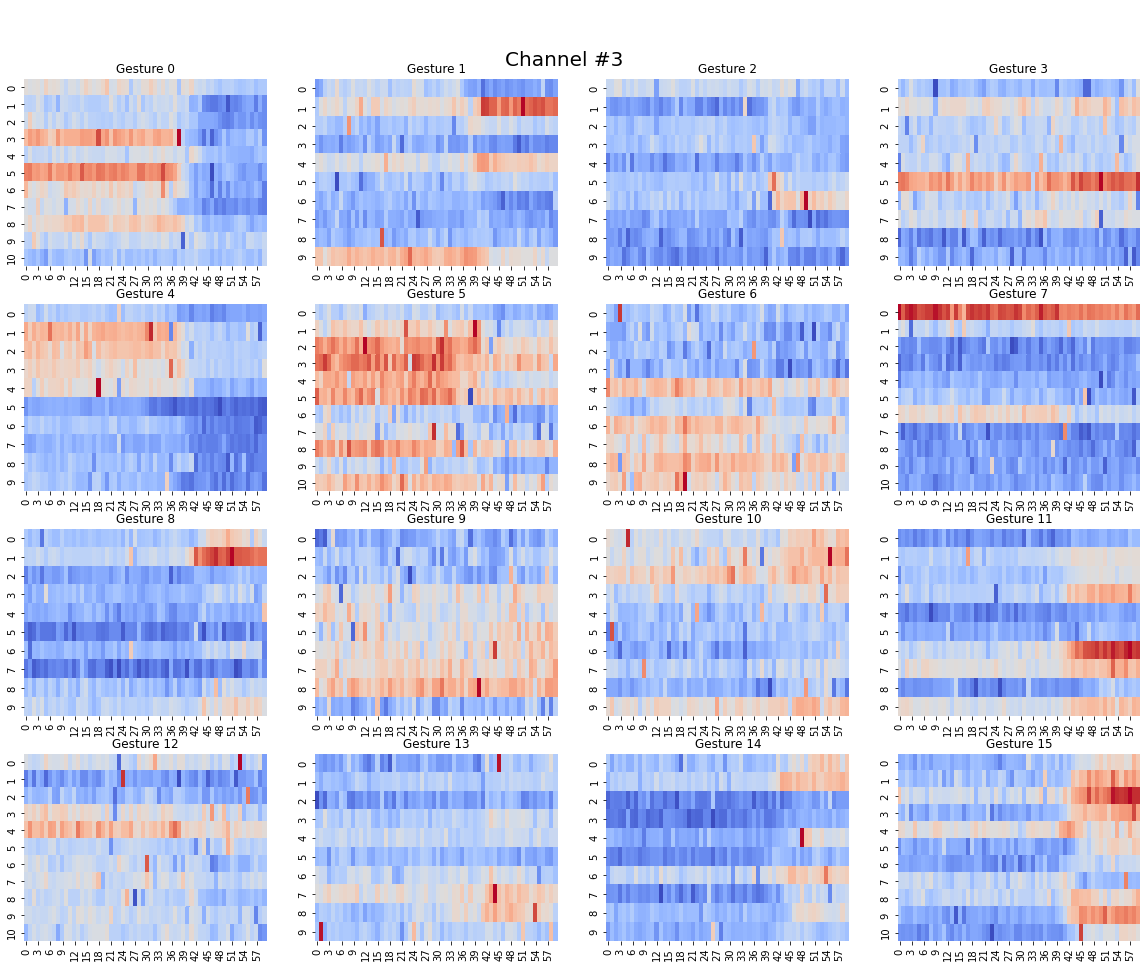

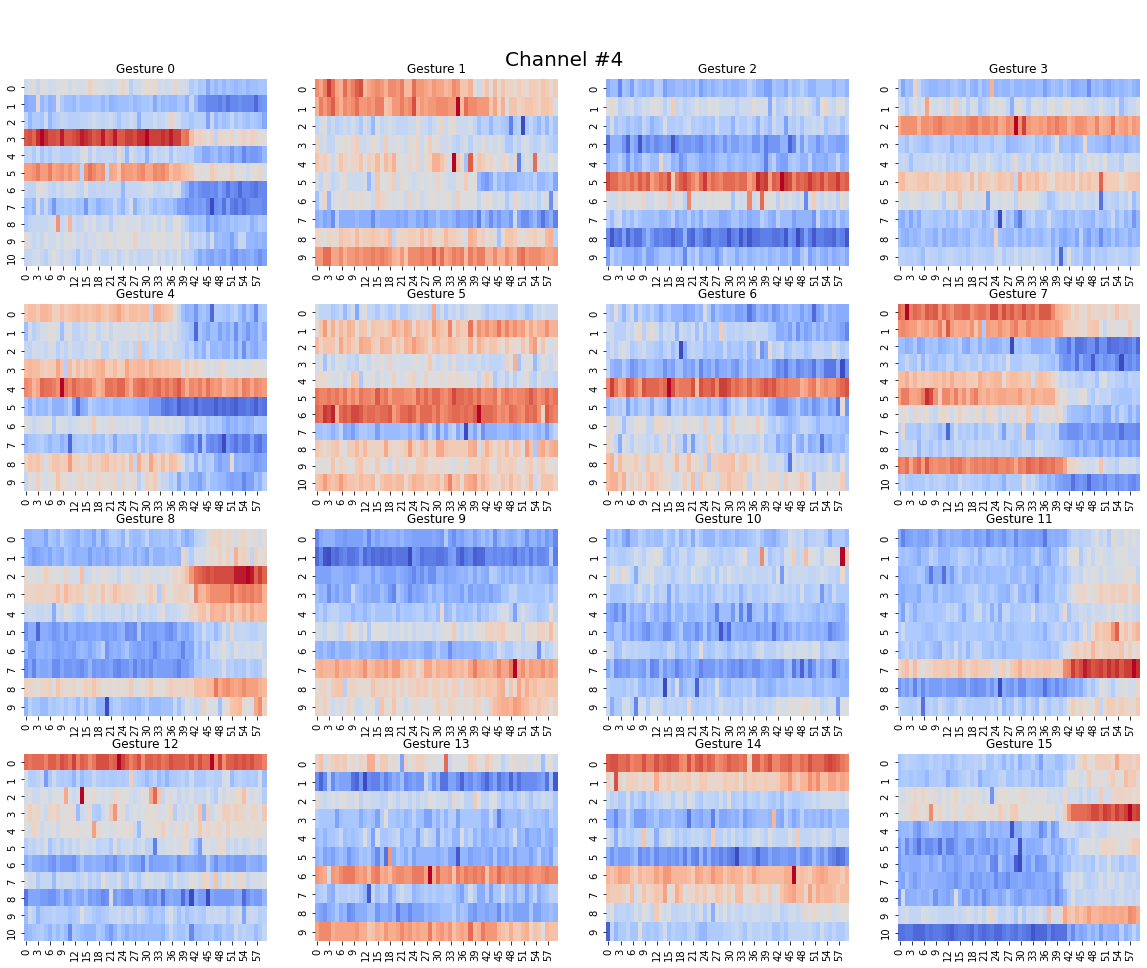

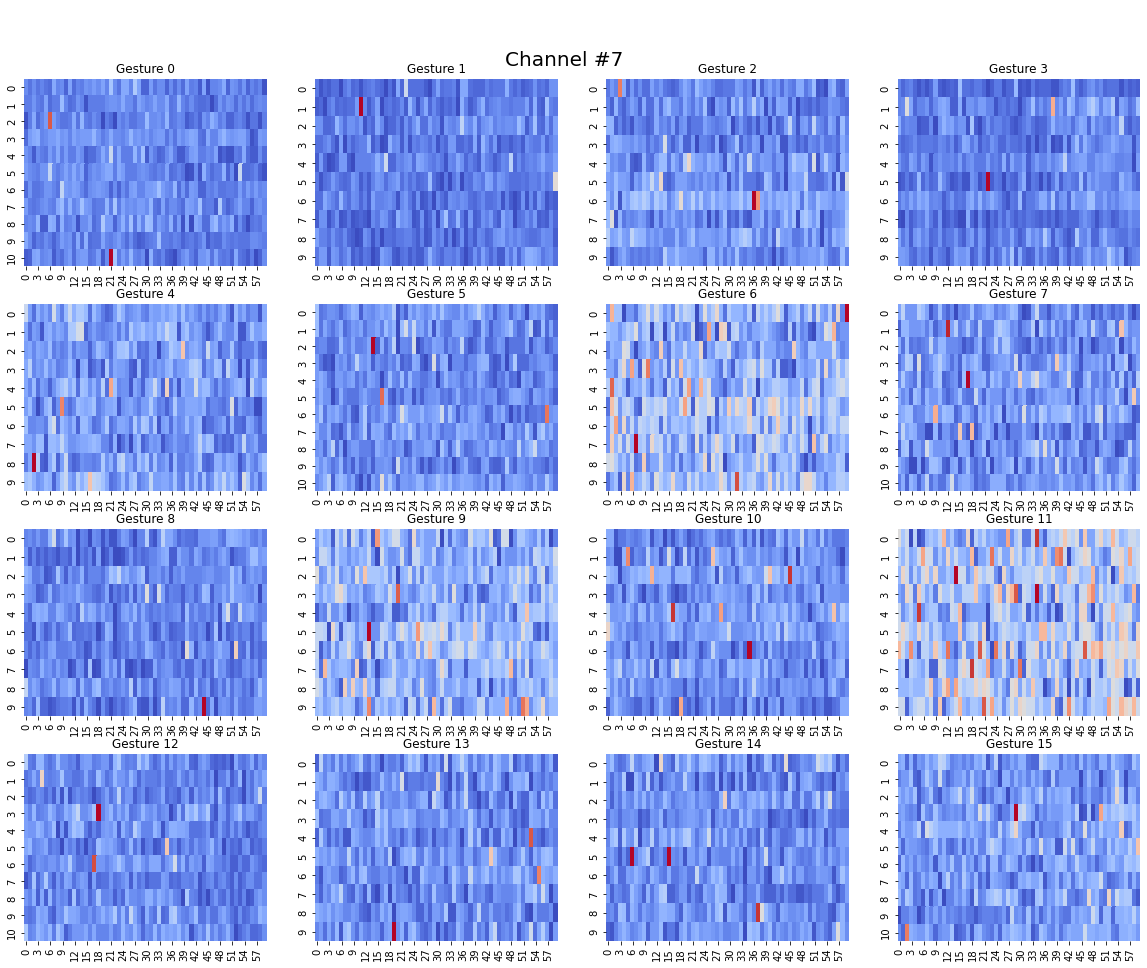

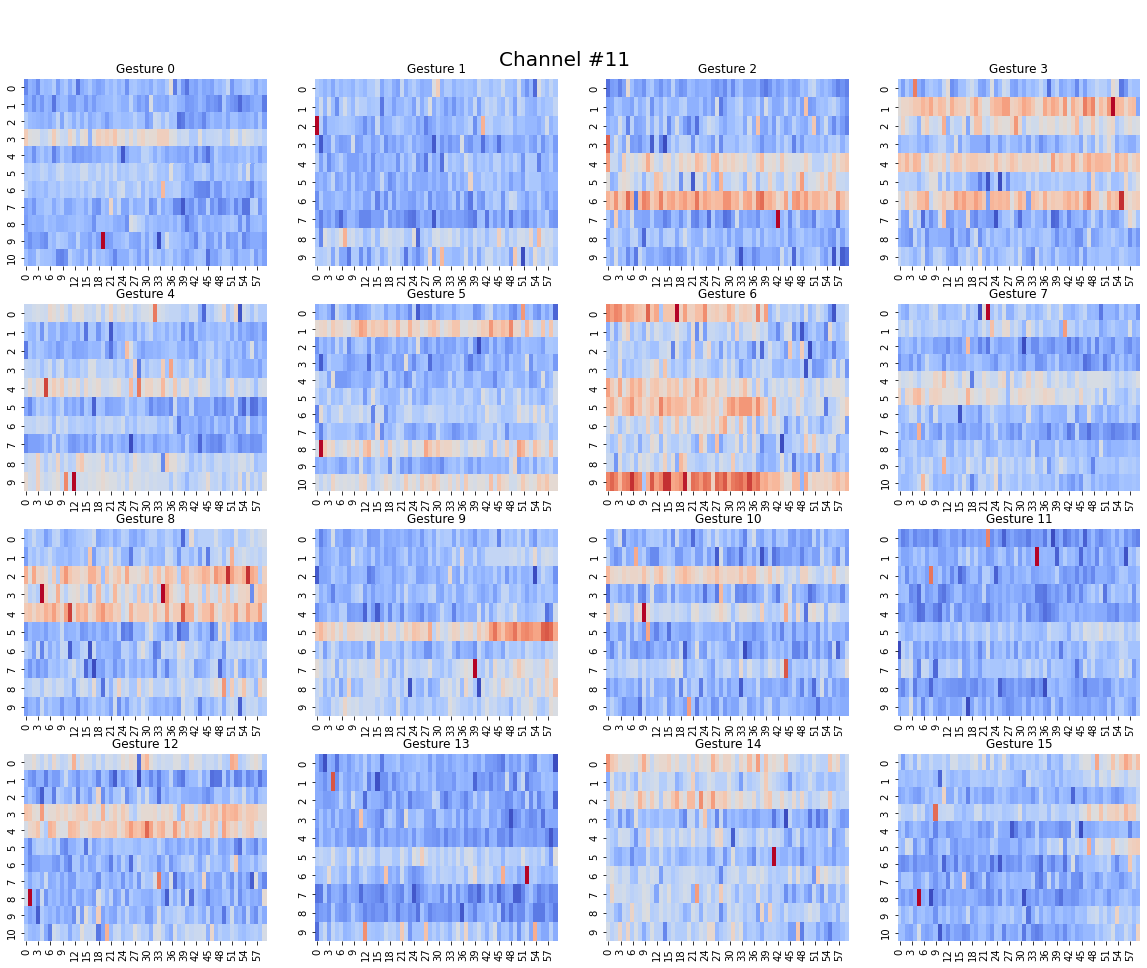

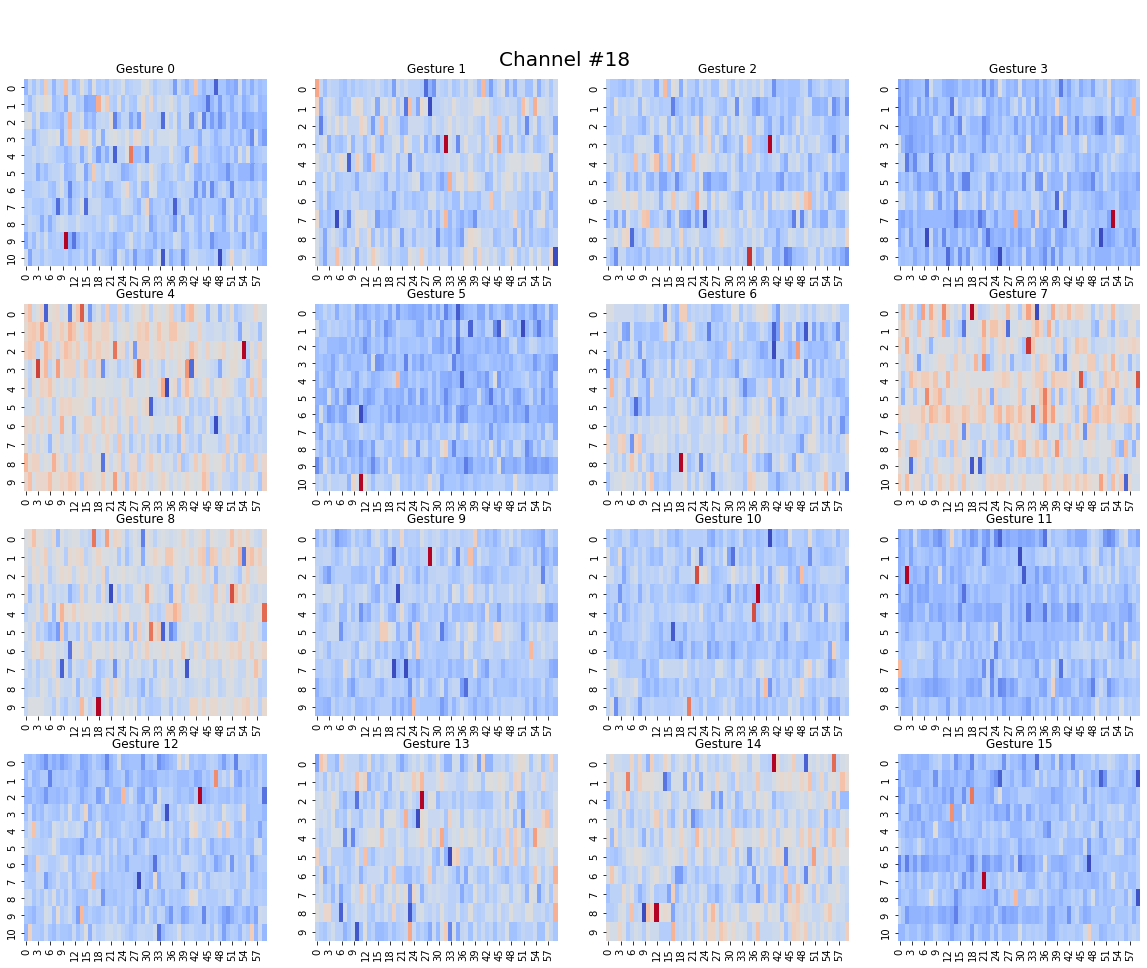

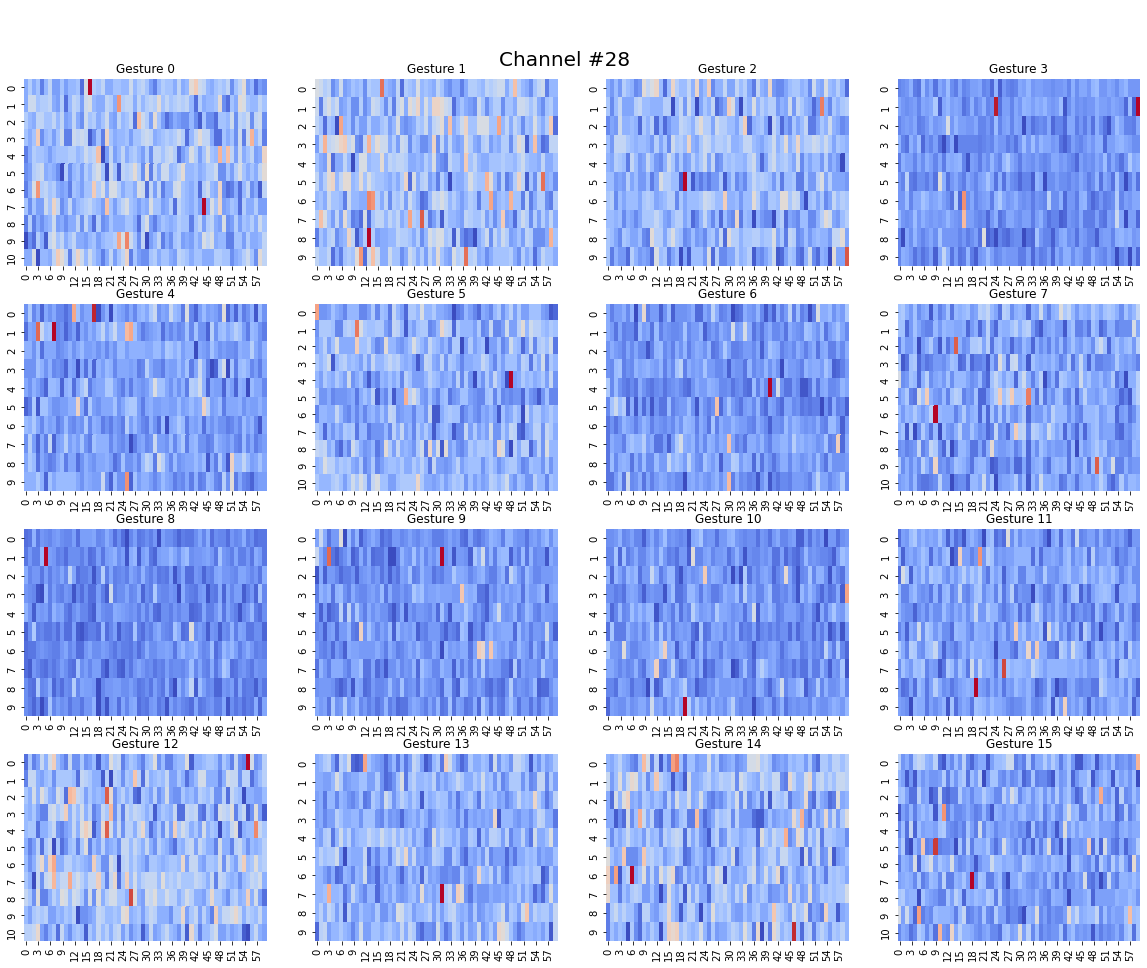

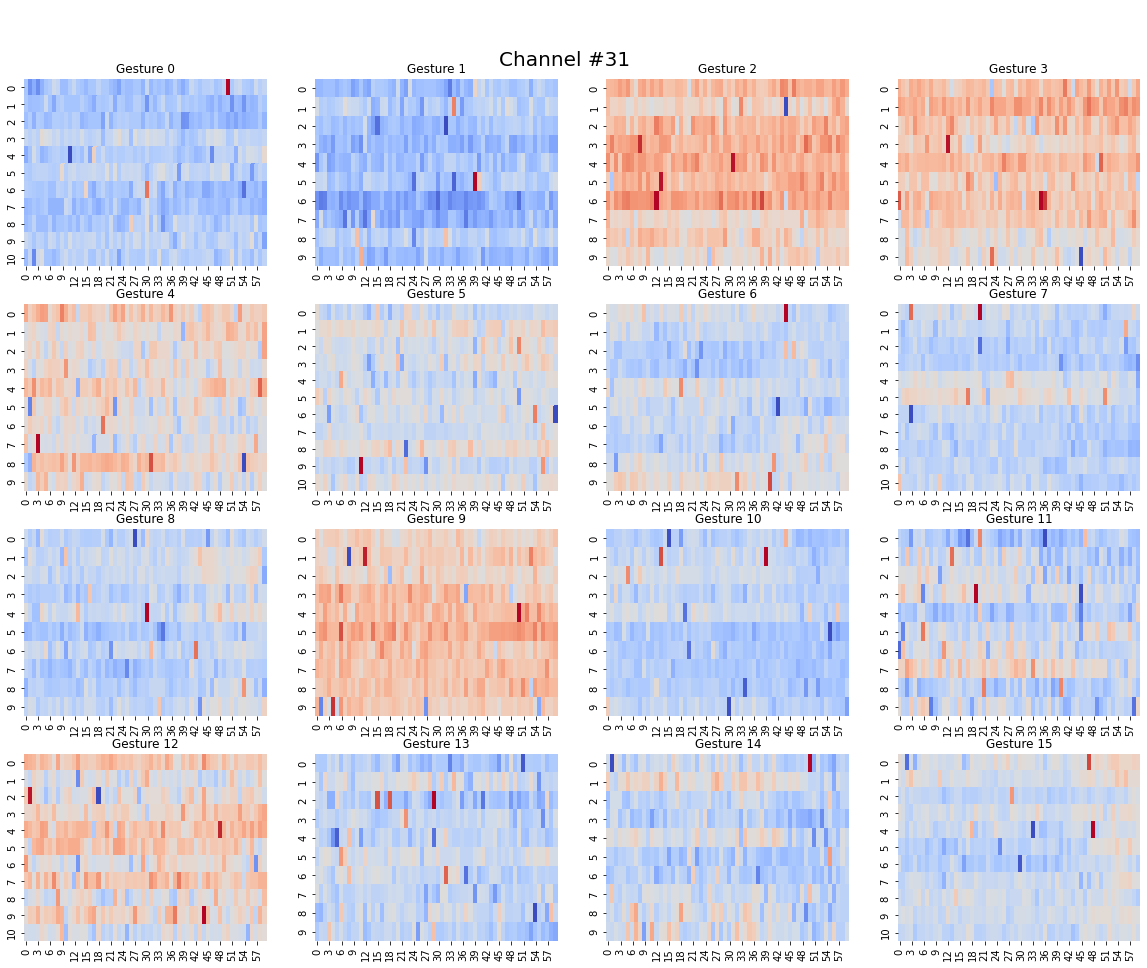

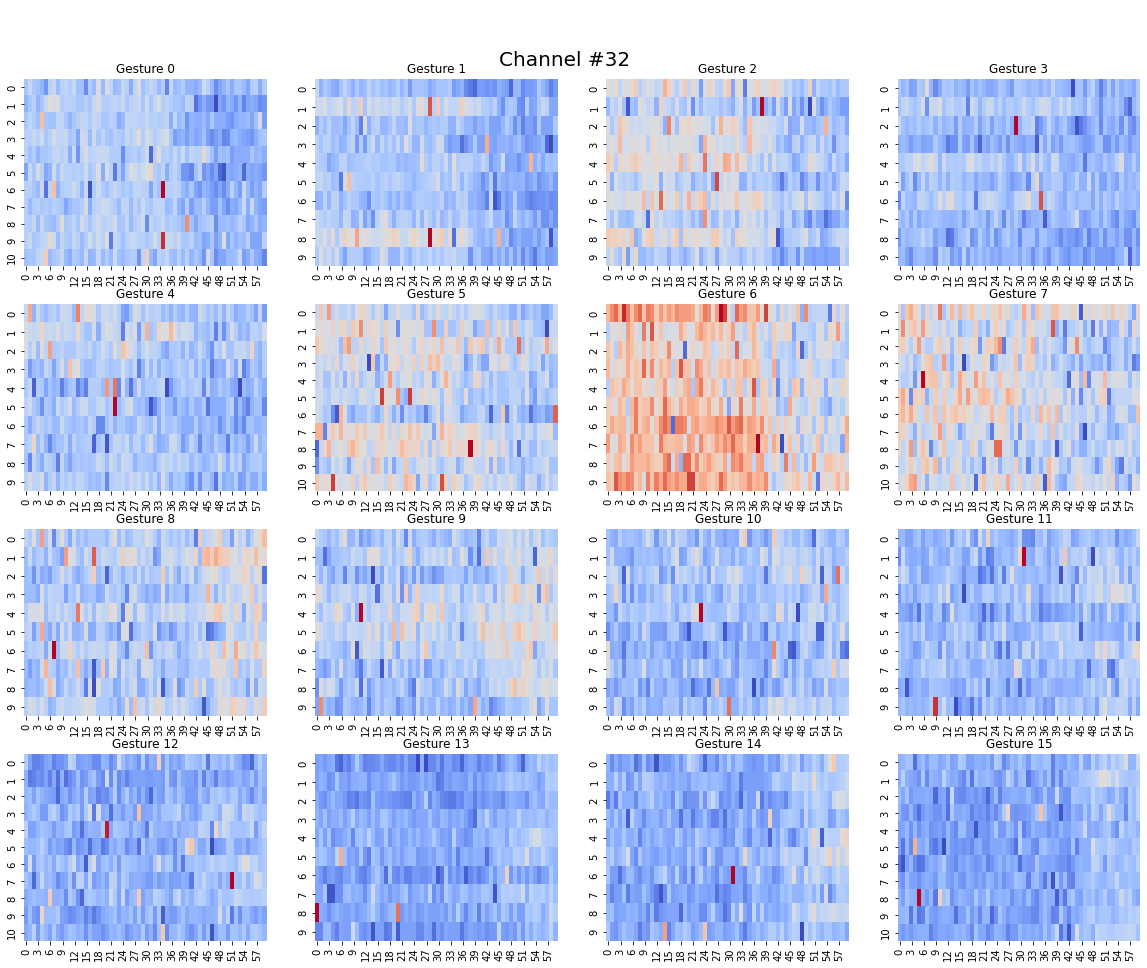

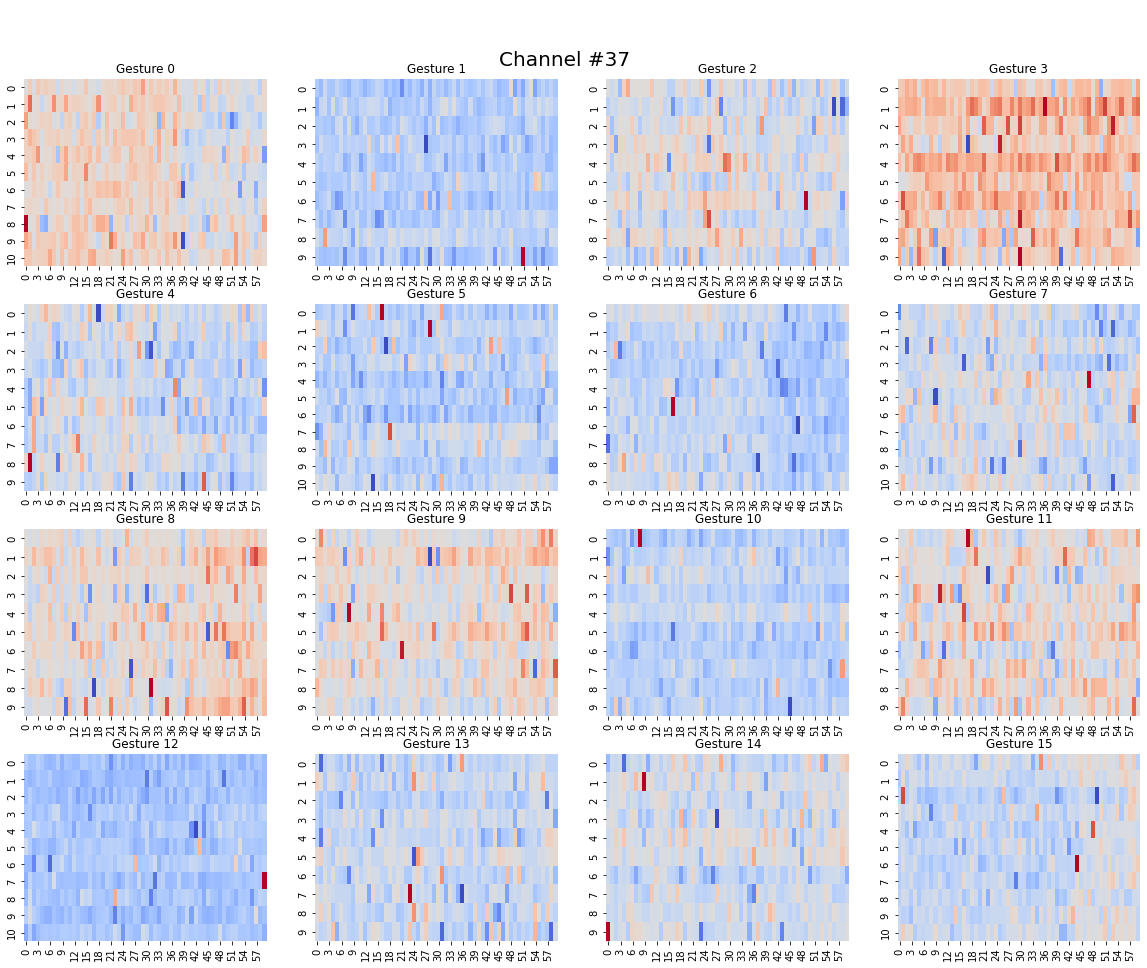

In [46]:
import seaborn as sns

channel_ls = [1, 3, 4, 7, 11, 18, 28, 31, 32, 37]

for k in range(len(channel_ls)):
    # индексы одного класса в X_train
    channel = channel_ls[k] # метка жеста 
    
    num_of_channels = X_train.shape[1]

    n_of_classes = 16

    fig_n_cols = 4
    fig, axs = plt.subplots(n_of_classes // fig_n_cols + 1, fig_n_cols, 
                        figsize=(20, 5 * n_of_classes // fig_n_cols))
    fig.suptitle(t=f'\n\nChannel #{channel}', y=0.93, fontsize=20);

    # строим графики всех наблюдений одного класса в X_train
    for i in range(n_of_classes):
        ax_curr = axs[i // fig_n_cols, i % fig_n_cols]
        ax_curr.set_title(f'Gesture {i}')
        cls_indices = np.asarray(y_train[y_train['Class'] == i].index)
        
        # XG = np.zeros((len(cls_indices), 60)) #on to heatmap

        for j in range(len(cls_indices)):
            ax_curr.plot(X_train[cls_indices[j], channel, :], label=f'{j}'); #off to heatmap
            # XG[j, :] = X_train[cls_indices[j], channel, :] #on to heatmap
            # sns.heatmap(data=XG, ax=ax_curr, cbar=False, cmap='coolwarm'); #on to heatmap
            ax_curr.text(j*3, X_train[cls_indices[j], channel, j*3], f'{j}'); #off to heatmap
        
    del_emty_axes(axs)

In [30]:
X_train[0, 0, :]

array([[0.32495117, 0.32543945, 0.32495117, 0.32519531, 0.32568359,
        0.32568359, 0.32543945, 0.32568359, 0.32592773, 0.32568359,
        0.32495117, 0.32470703, 0.32348633, 0.32324219, 0.32250977,
        0.32226562, 0.32226562, 0.32226562, 0.32250977, 0.32250977,
        0.32177734, 0.32177734, 0.32177734, 0.32128906, 0.32080078,
        0.32055664, 0.32055664, 0.32006836, 0.31958008, 0.3190918 ,
        0.31835938, 0.31762695, 0.31689453, 0.31665039, 0.31689453,
        0.31665039, 0.31567383, 0.31201172, 0.30004883, 0.28100586,
        0.27392578, 0.24755859, 0.22509766, 0.21728516, 0.21508789,
        0.21386719, 0.21240234, 0.21069336, 0.20825195, 0.20556641,
        0.20385742, 0.20288086, 0.20214844, 0.2019043 , 0.20239258,
        0.203125  , 0.20336914, 0.20458984, 0.20556641, 0.20703125]])

In [ ]:
# X_train[2, 0].shape
X_train[164, 0, :]

array([0.19873047, 0.19848633, 0.19897461, 0.19995117, 0.20019531,
       0.20092773, 0.20166016, 0.20336914, 0.20361328, 0.20239258,
       0.20288086, 0.20239258, 0.20361328, 0.20483398, 0.20532227,
       0.20483398, 0.20581055, 0.20727539, 0.20751953, 0.20776367,
       0.20776367, 0.20825195, 0.20947266, 0.21020508, 0.2109375 ,
       0.21118164, 0.21166992, 0.21264648, 0.21313477, 0.21362305,
       0.21484375, 0.21557617, 0.21606445, 0.21655273, 0.21679688,
       0.21826172, 0.21875   , 0.21923828, 0.2175293 , 0.21020508,
       0.19775391, 0.18945312, 0.18725586, 0.19042969, 0.19165039,
       0.19213867, 0.19287109, 0.19140625, 0.19091797, 0.19091797,
       0.19018555, 0.18896484, 0.18847656, 0.1875    , 0.18652344,
       0.18554688, 0.18505859, 0.18432617, 0.18383789, 0.18334961])